# Original dataset exploration

In [2]:
from pathlib import Path
import pandas as pd

project_root = Path.cwd().parent 
data_path = project_root / "data" / "online_retail_raw.csv"

df = pd.read_csv(data_path)
print(f'Dataset is ready. It has {df.shape[0]} rows and {df.shape[1]} columns')

Dataset is ready. It has 541909 rows and 8 columns


# Column types and missing values

In [ ]:
df.info()          

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Overall observations:
- Column types:
    - Object (5): InvoiceNo, StockCode, Description, InvoiceDate, Country
    - Numeric (3): Quantity (int64), UnitPrice (float64), CustomerID (float64)
- Memory usage: 33.1 MB
- Next steps:
    - InvoiceNo and StockCode are non-numerical - further exploration is needed, may need conversion to numerical 
    - InvoiceDate is an object, may need datetime conversion

In [ ]:
print('Missing values per column count')
print(df.isnull().sum())

Missing values per column count
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


Missing values observation
- `Description` column: 1,454 missing values (~0.3% of rows)
- `CustomerID` column: 135,080 missing values (~25% of rows)
- Other columns are fully populated (no missing values)
- Next steps: Decide how to handle missing values during cleaning

# Completeness check

Overall completeness measuring all data points: 96.85%


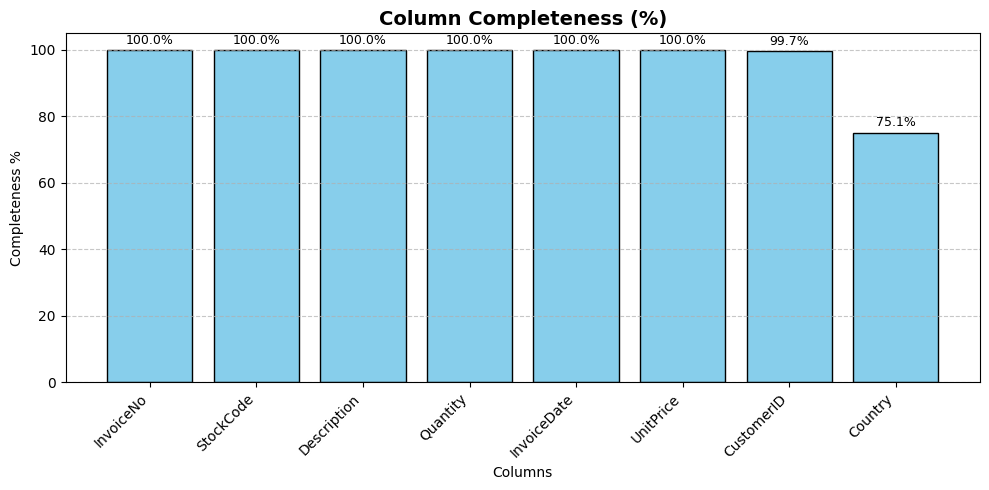

In [38]:
import matplotlib.pyplot as plt

overall_completeness = df.notnull().sum().sum() / df.size * 100
print(f"Overall completeness measuring all data points: {overall_completeness:.2f}%")

# Calculate completeness per column
completeness = df.notnull().mean() * 100

# Create the plot
plt.figure(figsize=(10, 5))
bars = plt.bar(
    completeness.index,
    completeness.sort_values(ascending=False),
    color='skyblue',
    edgecolor='black'
)

plt.title('Column Completeness (%)', fontsize=14, fontweight='bold')
plt.ylabel('Completeness %')
plt.xlabel('Columns')
plt.ylim(0, 105)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add % labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,                # slightly above the bar
        f'{height:.1f}%',          # one decimal place
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.tight_layout()
plt.show()


Completeness observations
- Overall completeness measuring all data points: 96.85%
- Column-level completeness:
    - Description: 99.7%
    - CustomerID: 75.1%
    - All other columns: 100%
- This highlights the columns that need attention for data quality checks.

# Duplicates check

In [9]:
duplicate_count = df.duplicated().sum()
print(f"Number of completely duplicated rows: {duplicate_count}")
df[df.duplicated(keep=False)].sort_values('InvoiceNo').head(10)

Number of completely duplicated rows: 5268


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
604,536412,21448,12 DAISY PEGS IN WOOD BOX,2,12/1/2010 11:49,1.65,17920.0,United Kingdom
605,536412,22902,TOTE BAG I LOVE LONDON,7,12/1/2010 11:49,2.10,17920.0,United Kingdom


Observations:
- Duplicates represent exact repeats of transactions (same InvoiceNo, StockCode, Quantity, etc.).
- Next step: remove duplicates during the cleaning phase to ensure data accuracy and consistency.

# Anomalies investigation

In [39]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Anomalies observation on numerical columns:
- Negative Values: Found in Quantity and UnitPrice columns, which likely represent errors or returns - further investigation is needed.
- Very Wide Range in Quantity: The range of the Quantity column (from -80,995 to 80,995) indicates the presence of outliers (either large orders or errors). Most transactions are small quantities, but some records appear to be bulk purchases and/or mistakes.
- High Prices: A UnitPrice of 38,970 is likely an outlier/error.


Next Steps:

Investigate negative values in Quantity and UnitPrice to decide if they need to be corrected or removed
Outlier detection for high Quantity and UnitPrice values

In [ ]:
# Filter rows where UnitPrice is negative
negative_values_df = df[ (df['UnitPrice'] < 0)]
print(f"Number of rows with negative UnitPrice: {negative_values_df.shape[0]}")

# Filter rows where Quantity is negative
negative_values_df = df[(df['Quantity'] < 0)]
print(f"Number of rows with negative Quantity: {negative_values_df.shape[0]}")

# Filter rows where Quantity and  UnitPrice are negative
negative_values_df = df[(df['Quantity'] < 0) & (df['UnitPrice'] < 0)]
print(f"Number of rows with negative values: {negative_values_df.shape[0]}")

Number of rows with negative UnitPrice: 2
Number of rows with negative Quantity: 10624
Number of rows with negative values: 0


# Negative UnitPrice Investigation - Deep dive

In [63]:
# Filter rows with negative quantities
negative_quantity_df = df[df['Quantity'] < 0]

# 1. Check how many unique InvoiceNo, StockCode, CustomerID combinations have negative quantities
negative_quantity_counts = negative_quantity_df.groupby(['InvoiceNo', 'StockCode', 'CustomerID']).size().reset_index(name='count')
print(f"Number of unique negative quantity transactions: {negative_quantity_counts.shape[0]}")

# 2. Check for matching positive transactions (same InvoiceNo, StockCode, and CustomerID)
matching_positive_cancellations = pd.merge(
    negative_quantity_df,
    df[(df['Quantity'] > 0)],
    on=['InvoiceNo', 'StockCode', 'CustomerID'],
    suffixes=('_negative', '_positive')
)

print(f"Number of matching positive transactions: {matching_positive_cancellations.shape[0]}")

# 3. Get a quick summary of the most common StockCodes with negative quantities
top_negative_stockcodes = negative_quantity_df['StockCode'].value_counts().head(10)
print(f"Top 10 StockCodes with negative quantities:\n{top_negative_stockcodes}")

# 4. Look at a sample of negative quantity records
print(f"Sample negative quantity records:\n{negative_quantity_df.head(10)}")


Number of unique negative quantity transactions: 8806
Number of matching positive transactions: 0
Top 10 StockCodes with negative quantities:
StockCode
M        244
22423    184
POST     126
22960     87
D         77
22720     76
S         61
21232     61
22699     54
22197     50
Name: count, dtype: int64
Sample negative quantity records:
    InvoiceNo StockCode                        Description  Quantity  \
141   C536379         D                           Discount        -1   
154   C536383    35004C    SET OF 3 COLOURED  FLYING DUCKS        -1   
235   C536391     22556     PLASTERS IN TIN CIRCUS PARADE        -12   
236   C536391     21984   PACK OF 12 PINK PAISLEY TISSUES        -24   
237   C536391     21983   PACK OF 12 BLUE PAISLEY TISSUES        -24   
238   C536391     21980  PACK OF 12 RED RETROSPOT TISSUES        -24   
239   C536391     21484        CHICK GREY HOT WATER BOTTLE       -12   
240   C536391     22557   PLASTERS IN TIN VINTAGE PAISLEY        -12   
241   C536

In [59]:
# Filter rows where UnitPrice is negative
negative_unit_price_df = df[df['UnitPrice'] < 0]

# Display some basic info about these rows
print(negative_unit_price_df[['InvoiceNo', 'StockCode', 'Quantity', 'UnitPrice', 'InvoiceDate', 'Country','CustomerID', 'Description']].head())

# Check if there are any duplicates for the same InvoiceNo and StockCode with positive UnitPrice
positive_unit_price_duplicates = df[(df['InvoiceNo'].isin(negative_unit_price_df['InvoiceNo'])) & 
                                     (df['StockCode'].isin(negative_unit_price_df['StockCode'])) &
                                     (df['UnitPrice'] > 0)]

print(f"Found {positive_unit_price_duplicates.shape[0]} rows with positive prices for the same InvoiceNo and StockCode.")


       InvoiceNo StockCode  Quantity  UnitPrice         InvoiceDate  \
299983   A563186         B         1  -11062.06 2011-08-12 14:51:00   
299984   A563187         B         1  -11062.06 2011-08-12 14:52:00   

               Country  CustomerID      Description  
299983  United Kingdom         NaN  Adjust bad debt  
299984  United Kingdom         NaN  Adjust bad debt  
Found 0 rows with positive prices for the same InvoiceNo and StockCode.


Further investigation: 
- do we have any StockCode B transactions which are not negative?

In [58]:
# Filter for StockCode 'B' and UnitPrice > 0
positive_transactions_B = df[(df['StockCode'] == 'B') & (df['UnitPrice'] > 0)]

# Show the number of positive transactions in StockCode 'B'
print(f"Number of positive transactions for StockCode 'B': {positive_transactions_B.shape[0]}")

# Display a few of these positive transactions for inspection
print(positive_transactions_B[['InvoiceNo', 'StockCode', 'Quantity', 'UnitPrice', 'InvoiceDate', 'CustomerID', 'Description']].head())

Number of positive transactions for StockCode 'B': 1
       InvoiceNo StockCode  Quantity  UnitPrice         InvoiceDate  \
299982   A563185         B         1   11062.06 2011-08-12 14:50:00   

        CustomerID      Description  
299982         NaN  Adjust bad debt  


UnitPrice anomalies summary:
We identified two rows with negative unit prices for StockCode 'B' (both on 12/08/2011, with the same unit price).
The positive transaction for the same StockCode (Item B) occurred just before these negative transactions, and there are only 3 transactions with StokeCode B in the dataset.
Given the matching amounts and close timestamps, these negative transactions likely represent cancellations or corrections to a previous transaction.
Conclusion: The negative transactions are likely to indicate a mistaken or faulty processing of the high-priced item.
Next step: remove both rows with Negative negative UnitPrice and corresponding transaction with the positive UnitPrice -tbc? maybe we want to keep the record of cancellations?

In [ ]:
# Takes long time to run
#Exploration - what StockCodes have non-null CustomerIDs? -> Shows that StockCode id column is non-numerical indeed
# Get distinct StockCode values
distinct_stockcodes = df['StockCode'].unique()

# For each StockCode, check how many have non-null CustomerID
stockcode_customerid_check = []

for code in distinct_stockcodes:
    # Filter rows by StockCode and check how many have non-null CustomerID
    customer_data = df[df['StockCode'] == code]['CustomerID'].notnull().sum()
    stockcode_customerid_check.append((code, customer_data))

# Display results as a DataFrame for easier reading
stockcode_customerid_df = pd.DataFrame(stockcode_customerid_check, columns=['StockCode', 'Non-Null CustomerID Count'])
stockcode_customerid_df = stockcode_customerid_df.sort_values(by='Non-Null CustomerID Count', ascending=False)

# Display the first few entries
print(stockcode_customerid_df.head())

     StockCode  Non-Null CustomerID Count
0       85123A                       2077
532      22423                       1905
140     85099B                       1662
9        84879                       1418
1646     47566                       1416


# Negative Quantities investigation

According to the dataset description, 'C" in the InvoiceNo column means cancellation
Can transactions with negative values be cancellations?

In [79]:
# Step 1: Filter records with negative Quantity
negative_qty_df = df[df['Quantity'] < 0]

# Step 2: Count unique InvoiceNo that have 'C' in the InvoiceNo for negative quantity records
cancellations_in_invoice = negative_qty_df[negative_qty_df['InvoiceNo'].str.startswith('C')]
total_cancellations = cancellations_in_invoice['InvoiceNo'].count()

# Get the total number of negative quantity transactions (count of rows, not unique InvoiceNo)
total_negative_qty = negative_qty_df.shape[0]

# Print out the findings

print(f"Total cancellations: {total_cancellations}")
print(f"Total number of negative quantity transactions: {total_negative_qty}")

Total cancellations: 9288
Total number of negative quantity transactions: 10624


Majority of negative values in Quantity comes from cancelled transactions, but what about the rest?

In [80]:
non_cancellation_negative_qty = df[~df['InvoiceNo'].str.startswith('C') & (df['Quantity'] < 0)]

# Show the first few rows to inspect
print(non_cancellation_negative_qty.head(5))

     InvoiceNo StockCode Description  Quantity         InvoiceDate  UnitPrice  \
2406    536589     21777         NaN       -10 2010-12-01 16:50:00        0.0   
4347    536764    84952C         NaN       -38 2010-12-02 14:42:00        0.0   
7188    536996     22712         NaN       -20 2010-12-03 15:30:00        0.0   
7189    536997     22028         NaN       -20 2010-12-03 15:30:00        0.0   
7190    536998     85067         NaN        -6 2010-12-03 15:30:00        0.0   

      CustomerID         Country  
2406         NaN  United Kingdom  
4347         NaN  United Kingdom  
7188         NaN  United Kingdom  
7189         NaN  United Kingdom  
7190         NaN  United Kingdom  


Hypothesis:
The rest of transactions with negative values are transactions with zero unit price

In [74]:
# Filter rows where InvoiceNo does not start with 'C' and Quantity is negative
non_cancellation_negative_qty = df[~df['InvoiceNo'].str.startswith('C') & (df['Quantity'] < 0)]

# Check if all of these rows have UnitPrice = 0
all_zero_unit_price = (non_cancellation_negative_qty['UnitPrice'] == 0).all()

print(f"Do all records with negative quantities (and without 'C' in InvoiceNo) have a UnitPrice of 0? {all_zero_unit_price}")


Do all records with negative quantities (and without 'C' in InvoiceNo) have a UnitPrice of 0? True


In [75]:
# Filter rows where UnitPrice is 0
zero_unit_price_df = df[df['UnitPrice'] == 0]

# Check if all of these rows have negative Quantity
all_negative_qty = (zero_unit_price_df['Quantity'] < 0).all()

print(f"Do all transactions with 0 UnitPrice have negative quantities? {all_negative_qty}")

Do all transactions with 0 UnitPrice have negative quantities? False


In [77]:
df_filtered = df[df['UnitPrice'] != 0]

# Count transactions with 'C' in InvoiceNo (likely cancellations)
cancellations = df_filtered[df_filtered['InvoiceNo'].str.startswith('C')]

# Count transactions with negative Quantity
negative_qty = df_filtered[df_filtered['Quantity'] < 0]

# Now compare the counts
print("Number of cancellations (with 'C' in InvoiceNo):", cancellations.shape[0])
print("Number of transactions with negative Quantity:", negative_qty.shape[0])

# Optionally, check for overlap (whether negative quantities are all cancellations)
overlap = cancellations[cancellations['Quantity'] < 0]
print("Number of cancellations with negative quantities:", overlap.shape[0])

Number of cancellations (with 'C' in InvoiceNo): 9288
Number of transactions with negative Quantity: 9288
Number of cancellations with negative quantities: 9288


Observation:
Transactions with negative quantity include:
- all cancelled transactions
- some of the transactions with 0 unit price
But how shall we proceed? For cancelled transactions, would we need to remove corresponding original transactions? Can we identify them?

In [82]:
# Take a random sample of 10 cancellation transactions
random_cancellations = cancellations.sample(n=3, random_state=42)
print (random_cancellations)


       InvoiceNo StockCode                     Description  Quantity  \
12946    C537402     22926  IVORY GIANT GARDEN THERMOMETER        -4   
333645   C566205     22111    SCOTTIE DOG HOT WATER BOTTLE        -1   
44299    C540164     21412        VINTAGE GOLD TINSEL REEL        -6   

               InvoiceDate  UnitPrice  CustomerID         Country  
12946  2010-12-06 14:43:00       5.95     15502.0  United Kingdom  
333645 2011-09-09 14:58:00       4.95     16362.0  United Kingdom  
44299  2011-01-05 12:02:00       0.42     14911.0            EIRE  


In [83]:
# Take a random sample of 3 cancellations
random_cancellations = cancellations.sample(n=3, random_state=42)

# Initialize a list to store corresponding original transactions
corresponding_originals = []

# For each random cancellation, find all transactions with the same description and customer
for index, row in random_cancellations.iterrows():
    description = row['Description']
    customer_id = row['CustomerID']
    
    # Find all transactions for this product and customer, excluding cancellations
    original_transactions = df[(df['Description'] == description) & 
                               (df['CustomerID'] == customer_id) & 
                               (~df['InvoiceNo'].str.startswith('C'))]
    
    # Append to list
    corresponding_originals.append(original_transactions)

# Print the corresponding original transactions for each random cancellation
for i, original in enumerate(corresponding_originals):
    print(f"Original transactions for cancellation {i+1}:")
    print(original[['InvoiceNo', 'StockCode', 'Quantity', 'UnitPrice', 'Description', 'CustomerID']])
    print("\n")

Original transactions for cancellation 1:
      InvoiceNo StockCode  Quantity  UnitPrice  \
9782     537217     22926         4       5.95   
13015    537407     22926         4       5.95   

                          Description  CustomerID  
9782   IVORY GIANT GARDEN THERMOMETER     15502.0  
13015  IVORY GIANT GARDEN THERMOMETER     15502.0  


Original transactions for cancellation 2:
       InvoiceNo StockCode  Quantity  UnitPrice                   Description  \
333621    566203     22111         1       4.95  SCOTTIE DOG HOT WATER BOTTLE   
333651    566206     22111         3       4.95  SCOTTIE DOG HOT WATER BOTTLE   
446078    574873     22111         5       4.95  SCOTTIE DOG HOT WATER BOTTLE   

        CustomerID  
333621     16362.0  
333651     16362.0  
446078     16362.0  


Original transactions for cancellation 3:
Empty DataFrame
Columns: [InvoiceNo, StockCode, Quantity, UnitPrice, Description, CustomerID]
Index: []




Observation: cancellation might have corresponding original transaction within our dataset or might have not (probably earlier transactions)
Next step: what do we do we cancelled transactions?

Transactions with NaN value in the UnitPrice column - what these are about?

In [89]:
zero_unit_price_df = df[df['UnitPrice'] == 0]

# Total number of transactions with 0 UnitPrice
total_zero_unit_price = zero_unit_price_df.shape[0]

# Number of transactions with NaN CustomerID
nan_customer_id = zero_unit_price_df[zero_unit_price_df['CustomerID'].isna()].shape[0]

# Number of transactions with non-NaN CustomerID
non_nan_customer_id = zero_unit_price_df[zero_unit_price_df['CustomerID'].notna()].shape[0]

# Display the results
print(f"Total number of transactions with 0 UnitPrice: {total_zero_unit_price}")
print(f"Number of transactions with NaN CustomerID: {nan_customer_id}")
print(f"Number of transactions with non-NaN CustomerID: {non_nan_customer_id}")

Total number of transactions with 0 UnitPrice: 2515
Number of transactions with NaN CustomerID: 2475
Number of transactions with non-NaN CustomerID: 40


In [86]:
# Step 1: Filter transactions with 0 UnitPrice and non-NaN CustomerID
non_nan_customer_zero_price = df[(df['UnitPrice'] == 0) & (df['CustomerID'].notna())]

# Step 2: Count these transactions
num_non_nan_customer_zero_price = non_nan_customer_zero_price.shape[0]
print(f"Number of transactions with 0 UnitPrice and non-NaN CustomerID: {num_non_nan_customer_zero_price}")

# Step 3: View some details about these transactions (InvoiceNo, StockCode, Quantity, CustomerID, etc.)
print("\nSample of transactions with 0 UnitPrice and non-NaN CustomerID:")
print(non_nan_customer_zero_price[['InvoiceNo', 'StockCode', 'Quantity', 'UnitPrice', 'Description', 'CustomerID']].head())

# Step 4: Check the distribution of StockCodes for these records to see if it's product-specific
stock_code_distribution = non_nan_customer_zero_price['StockCode'].value_counts()
print(f"\nDistribution of StockCodes for transactions with 0 UnitPrice and non-NaN CustomerID:\n{stock_code_distribution}")



Number of transactions with 0 UnitPrice and non-NaN CustomerID: 40

Sample of transactions with 0 UnitPrice and non-NaN CustomerID:
      InvoiceNo StockCode  Quantity  UnitPrice                   Description  \
9302     537197     22841         1        0.0  ROUND CAKE TIN VINTAGE GREEN   
33576    539263     22580         4        0.0  ADVENT CALENDAR GINGHAM SACK   
40089    539722     22423        10        0.0      REGENCY CAKESTAND 3 TIER   
47068    540372     22090        24        0.0       PAPER BUNTING RETROSPOT   
47070    540372     22553        24        0.0        PLASTERS IN TIN SKULLS   

       CustomerID  
9302      12647.0  
33576     16560.0  
40089     14911.0  
47068     13081.0  
47070     13081.0  

Distribution of StockCodes for transactions with 0 UnitPrice and non-NaN CustomerID:
StockCode
M         6
22580     1
22841     1
22423     1
22090     1
22168     1
22553     1
22062     1
22055     1
22162     1
84535B    1
22636     1
47566     1
22167     1
226

Key Observations:

- The transactions with zero prices span across many different StockCodes and Descriptions. 
- There are several recurring CustomerIDs in this group, such as 13081.0, 14646.0, 14911.0, and 16560.0, among others.
- Some customers have made multiple transactions with zero unit price. 
- Some products are labeled as "Manual" in their Description field (e.g., "Manual" appears several times)
- Some transactions involve bulk quantities like 240 units
- A large number of products in this list are decorative or party-related items 
- A few StockCodes stand out as unusual, such as 'M' and 'PADS'

Hypothesis:

These transactions with zero UnitPrice could potentially be internal transactions (e.g., staff purchases, promotions, or system-related adjustments) rather than typical customer sales. The recurring presence of "Manual" and the bulk quantities suggest that they might not be standard retail purchases.

In [90]:
# Filter the rows where CustomerID is NaN
nan_customer_transactions = df[df['CustomerID'].isna()]

# Check if any of these transactions have a non-zero UnitPrice
non_zero_unit_price_in_nan_customer = nan_customer_transactions[nan_customer_transactions['UnitPrice'] != 0]

# Display the results
if non_zero_unit_price_in_nan_customer.shape[0] > 0:
    print(f"There are {non_zero_unit_price_in_nan_customer.shape[0]} transactions with NaN CustomerID and non-zero UnitPrice.")
else:
    print("All transactions with NaN CustomerID have UnitPrice equal to 0.")

There are 132605 transactions with NaN CustomerID and non-zero UnitPrice.


In [91]:
# Filter transactions where CustomerID is NaN and UnitPrice is 0
nan_customer_zero_price = df[(df['CustomerID'].isna()) & (df['UnitPrice'] == 0)]

# Display the first 50 such transactions
print(nan_customer_zero_price.head(50))

      InvoiceNo StockCode Description  Quantity         InvoiceDate  \
622      536414     22139         NaN        56 2010-12-01 11:52:00   
1970     536545     21134         NaN         1 2010-12-01 14:32:00   
1971     536546     22145         NaN         1 2010-12-01 14:33:00   
1972     536547     37509         NaN         1 2010-12-01 14:33:00   
1987     536549    85226A         NaN         1 2010-12-01 14:34:00   
1988     536550     85044         NaN         1 2010-12-01 14:34:00   
2024     536552     20950         NaN         1 2010-12-01 14:34:00   
2025     536553     37461         NaN         3 2010-12-01 14:35:00   
2026     536554     84670         NaN        23 2010-12-01 14:35:00   
2406     536589     21777         NaN       -10 2010-12-01 16:50:00   
4347     536764    84952C         NaN       -38 2010-12-02 14:42:00   
4348     536765    84952C         NaN        19 2010-12-02 14:43:00   
6391     536941     22734      amazon        20 2010-12-03 12:08:00   
6392  

In [93]:
# Filter the dataset for transactions where UnitPrice is 0 and CustomerID is NaN
zero_price_nan_customer = df[(df['UnitPrice'] == 0) & df['CustomerID'].isna()]

# Calculate the total number of such records
total_zero_price_nan = zero_price_nan_customer.shape[0]

# Count occurrences of each unique description
description_counts = zero_price_nan_customer['Description'].value_counts()

# Calculate the percentage of each description within the total set
description_percentages = (description_counts / total_zero_price_nan) * 100

# Print the description and percentage
for description, count in description_counts.items():
    print(f"Description: {description} - Count: {count} - Percentage: {description_percentages[description]:.2f}%")


Description: check - Count: 159 - Percentage: 6.42%
Description: ? - Count: 47 - Percentage: 1.90%
Description: damages - Count: 45 - Percentage: 1.82%
Description: damaged - Count: 43 - Percentage: 1.74%
Description: found - Count: 25 - Percentage: 1.01%
Description: sold as set on dotcom - Count: 20 - Percentage: 0.81%
Description: adjustment - Count: 16 - Percentage: 0.65%
Description: Damaged - Count: 14 - Percentage: 0.57%
Description: thrown away - Count: 9 - Percentage: 0.36%
Description: Unsaleable, destroyed. - Count: 9 - Percentage: 0.36%
Description: FRENCH BLUE METAL DOOR SIGN 1 - Count: 9 - Percentage: 0.36%
Description: amazon - Count: 8 - Percentage: 0.32%
Description: Found - Count: 8 - Percentage: 0.32%
Description: FRENCH BLUE METAL DOOR SIGN 8 - Count: 8 - Percentage: 0.32%
Description: Amazon - Count: 7 - Percentage: 0.28%
Description: ?? - Count: 7 - Percentage: 0.28%
Description: RECIPE BOX PANTRY YELLOW DESIGN - Count: 7 - Percentage: 0.28%
Description: FRENCH BL